In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
from PIL import Image

In [2]:
c0 = sns.color_palette()[0]
c1 = sns.color_palette()[1]
c2 = sns.color_palette()[2]

In [3]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])
cmap_dark = ListedColormap(['#FF0000','#00FF00','#0000FF'])



In [4]:
dflog = pd.read_csv('data/01_heights_weights_genders.csv')
dflog.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


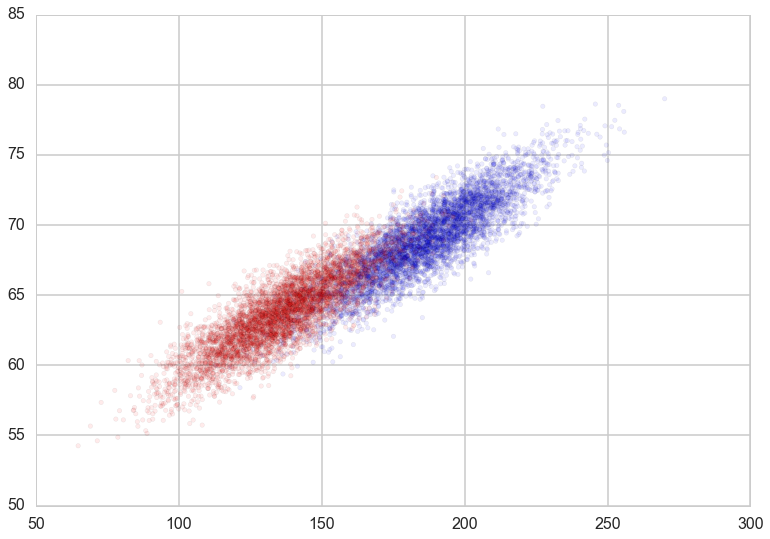

In [5]:
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(dflog.Weight, dflog.Height, c=[cm_bright.colors[i] for i in dflog.Gender=='Male'], alpha=0.08)

In [6]:
from sklearn.cross_validation import KFold
from sklearn.metrics import accuracy_score

def cv_score(clf, x, y, score_func = accuracy_score):
    result = 0
    nfold = 5
    for train, test in KFold(y.size, nfold):
        clf.fit(x[train],y[train])
        result+=score_func(clf.predict(x[test]),y[test])
    return result/nfold


In [7]:
from sklearn.cross_validation import train_test_split
Xlr, Xtestlr, ylr, ytestlr = train_test_split(dflog[['Height','Weight']].values, (dflog.Gender == 'Male').values)

In [8]:
Cs = [0.001, 0.1, 1, 10, 100]
from sklearn.linear_model import LogisticRegression
max_score = 0

for C in Cs:
    clf = LogisticRegression(C=C)
    score = cv_score(clf, Xlr, ylr)
    if score > max_score:
        max_score = score
        best_C = C
print max_score, best_C

0.918933333333 0.001


In [9]:
clfl = LogisticRegression(C=best_C)
clfl.fit(Xlr,ylr)
ypred=clfl.predict(Xtestlr)
accuracy_score(ypred, ytestlr)

0.91879999999999995

In [10]:

from sklearn.grid_search import GridSearchCV
clfl2 = LogisticRegression()
parameters = {'C':[0.0001, 0.001, 0.01, 0.1,1,10,100]}
fitmodel = GridSearchCV(clfl2, param_grid = parameters, cv=5, scoring ='accuracy' )
fitmodel.fit(Xlr, ylr)
fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_, fitmodel.grid_scores_

(LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 {'C': 10},
 0.91893333333333338,
 [mean: 0.91800, std: 0.00384, params: {'C': 0.0001},
  mean: 0.91853, std: 0.00416, params: {'C': 0.001},
  mean: 0.91853, std: 0.00390, params: {'C': 0.01},
  mean: 0.91880, std: 0.00429, params: {'C': 0.1},
  mean: 0.91880, std: 0.00429, params: {'C': 1},
  mean: 0.91893, std: 0.00431, params: {'C': 10},
  mean: 0.91893, std: 0.00431, params: {'C': 100}])

In [11]:
data= np.load('data/imag.pix.npy')
y=np.load('data/imag.lbl.npy')
STD_SIZE = (322, 137)
data.shape, y.shape

((87L, 132342L), (87L,))

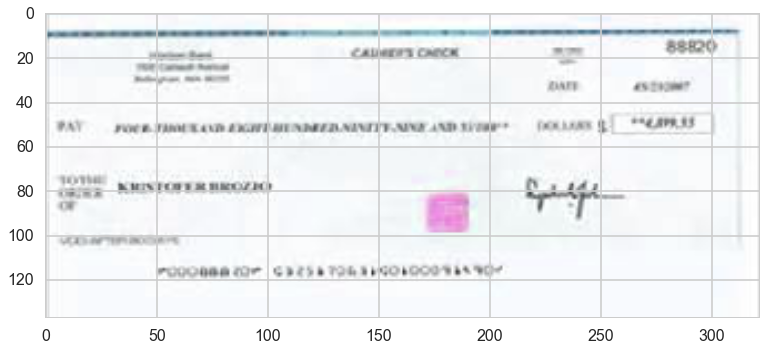

In [12]:
def get_image(data):
    size = STD_SIZE[0]*STD_SIZE[1]*3
    r,g,b = data[0:size:3],data[1:size:3], data[2:size:3]
    rgbArray = np.zeros((STD_SIZE[1],STD_SIZE[0], 3),'uint8')
    rgbArray[...,0]=r.reshape((STD_SIZE[1], STD_SIZE[0]))
    rgbArray[...,1]=b.reshape((STD_SIZE[1], STD_SIZE[0]))
    rgbArray[...,2]=g.reshape((STD_SIZE[1], STD_SIZE[0]))
    return rgbArray

def disp_img(data):
    plt.imshow(get_image(data))
    
disp_img(data[10])

In [13]:
from sklearn.decomposition import PCA
pca = PCA(60)
X = pca.fit_transform(data)


In [14]:
X.shape

(87L, 60L)

In [15]:
print pca.explained_variance_ratio_.sum()

0.942879528617


In [16]:
pca.explained_variance_ratio_*100

array([ 35.92596698,   6.29318801,   4.10778347,   3.11950952,
         2.81695972,   2.28831619,   2.10127949,   1.87404975,
         1.73264637,   1.53023773,   1.42159671,   1.318394  ,
         1.24701539,   1.16381841,   1.09958324,   1.06073157,
         1.00743046,   0.98023869,   0.96055948,   0.91535856,
         0.90185612,   0.85213309,   0.8367458 ,   0.79692356,
         0.75489846,   0.72505562,   0.70821781,   0.6796765 ,
         0.66092535,   0.64772084,   0.62739233,   0.59477344,
         0.58303101,   0.57450926,   0.57278186,   0.55261734,
         0.53858717,   0.53343191,   0.51665709,   0.49343182,
         0.48594565,   0.47762236,   0.47284194,   0.45620017,
         0.44417076,   0.44004494,   0.4346039 ,   0.42800383,
         0.42195733,   0.4100348 ,   0.40554006,   0.39424777,
         0.38943727,   0.38311261,   0.37925514,   0.36341299,
         0.36062508,   0.3497255 ,   0.34022686,   0.33491379])

In [17]:
df = pd.DataFrame({'y':y, 'label':np.where(y==1,'check','dollar')})


In [18]:
for i in range(pca.explained_variance_ratio_.shape[0]):
    df['pc%i' %(i+1)] = X[:,i]

In [19]:
df.head()

,label,y,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19,pc20,pc21,pc22,pc23,pc24,pc25,pc26,pc27,pc28,pc29,pc30,pc31,pc32,pc33,pc34,pc35,pc36,pc37,pc38,pc39,pc40,pc41,pc42,pc43,pc44,pc45,pc46,pc47,pc48,pc49,pc50,pc51,pc52,pc53,pc54,pc55,pc56,pc57,pc58,pc59,pc60
0,check,1,-22536.362571,2428.343967,2133.777242,-328.322450,1065.239885,-79.779510,425.028862,-622.482412,2490.207981,858.586365,-1072.565326,277.135956,-1117.008245,712.921050,-787.542306,414.930152,-195.835369,472.439595,-429.687952,609.645649,-588.997035,-266.805059,987.770869,-953.085804,1037.093164,-568.689960,-42.940841,-112.654017,520.389800,545.386992,-643.325633,-77.820997,-733.674370,1263.879103,586.756998,119.593373,-508.370089,-294.174840,-252.519347,-51.538313,-457.830940,758.886057,515.916103,440.076107,-463.097417,-225.847169,-72.615736,-280.709429,-588.030969,-448.784198,539.070474,173.421252,379.865134,160.692953,157.257050,450.314126,-227.221397,-112.364944,-186.038429,-68.330989
1,check,1,-22226.658684,709.255778,288.826225,-1300.635376,792.084752,-217.442930,-1076.777444,2115.106737,875.462523,1124.846524,-343.234147,-43.368372,547.937212,357.548885,-1761.499582,-372.120164,813.766003,293.993188,-941.050102,-154.191592,-1122.863363,507.700410,815.875978,-717.999469,289.149370,115.870070,816.665466,1144.817760,359.342436,120.101878,-851.744626,-582.296067,316.394094,176.118549,673.219112,657.451216,94.661336,192.333834,-142.834165,376.042041,120.771967,20.335283,697.047946,-22.197777,-299.883777,22.574739,-26.094463,-290.112096,1147.013054,318.365764,426.590209,-81.492381,218.911740,-293.833368,-574.800385,461.005213,-133.873301,86.549876,-68.253606,194.165434
2,check,1,-17364.260784,4252.027148,-793.802239,-1362.054543,374.230509,-3142.098137,-2514.239438,-1443.845989,121.012593,419.751003,-2083.156756,1717.655662,-723.242074,-1240.426110,-310.766668,-1059.408079,1385.595045,-799.959051,-2598.756819,880.676052,3384.434883,-389.628097,3414.296511,-1340.080791,-4755.217740,-1036.255043,2198.383527,-687.340263,-1379.299146,-2148.507251,-644.565929,-1683.784601,1774.957382,-3132.874465,861.445428,-2247.593057,3105.529724,-3040.391807,843.107937,-277.652726,1718.531906,-3134.639051,3721.305222,-1470.315986,-997.252433,665.795034,-629.128117,1304.004522,-113.079572,-2860.852264,2535.136052,-1801.134606,1147.956100,1897.679487,1262.972669,2524.590385,621.040293,-422.350399,-1367.147366,-822.139175
3,check,1,-22847.256199,900.591903,-577.203148,-180.315540,733.144739,107.929873,-1441.787045,1069.822194,-844.816567,1390.008267,1470.750252,-723.940456,-578.786597,-259.303433,932.522873,170.963935,-301.561034,871.589461,-180.217083,-1238.130123,557.669686,-174.747087,332.949651,370.770361,-934.637134,-180.894557,1318.174882,92.860081,273.711601,-464.485412,-167.088608,70.342765,101.594998,834.492608,195.240356,-635.616322,-394.941809,-336.312866,130.697946,352.956334,1431.120380,-790.615542,-977.419373,-580.005826,-414.524329,-520.226448,-706.248906,327.599586,-888.099678,-1645.789093,-91.398011,0.090413,66.658666,353.418805,82.527303,-737.466496,-662.261573,-535.062574,537.059324,-528.666270
4,check,1,-15868.672595,-3259.491423,-506.800796,-919.635265,-2166.553649,981.628130,1669.697325,391.328228,-1735.708244,-163.565703,-1626.848455,-556.071285,-863.023076,1721.533650,944.390131,-1133.831269,2139.645031,766.969676,-1093.378106,-602.035479,-28.726067,83.689740,505.980050,-1106.373987,332.008248,1227.814307,-708.139610,-713.030110,142.707832,-912.989078,1012.271645,3623.483860,2107.208639,-3363.795948,966.429469,2141.451996,-1849.211068,-2139.553978,2546.960143,472.873126,135.062864,1404.581160,1283.016300,1311.779794,269.914003,-960.813470,322.601451,-850.742712,3154.415688,1425.425648,946.439659,-2233.105652,109.845355,213.800180,-3525.269984,-2516.479764,722.617389,-1742.192699,-2282.672192,1720.499388


In [30]:
def normit(a):
    a=(a-a.min())/(a.max()-a.min())
    a=a*256
    return np.round(a)
def getNC(pc, j):
    size = 322*137*3
    r=pc.components_[j][0:size:3]
    g=pc.components_[j][1:size:3]
    b=pc.components_[j][2:size:3]
    r=normit(r)
    g=normit(g)
    b=normit(b)
    return r,g, b

In [31]:
def display_comp(pc, j):
    r, g, b = getNC(pc, j)
    rgbArray = np.zeros((137,322,3),'uint8')
    rgbArray[...,0]=r.reshape(137,322)
    rgbArray[...,1]=g.reshape(137,322)
    rgbArray[...,2]=b.reshape(137,322)
    plt.imshow(rgbArray)
    plt.xticks([])
    plt.yticks([])

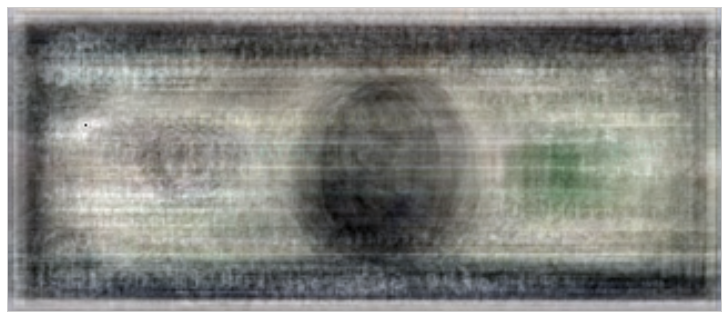

In [33]:
display_comp(pca,0)
#pca

In [34]:
c0

(0.2980392156862745, 0.4470588235294118, 0.6901960784313725)

In [35]:
c2

(0.7686274509803922, 0.3058823529411765, 0.3215686274509804)

In [36]:
colors = [c0,c2]

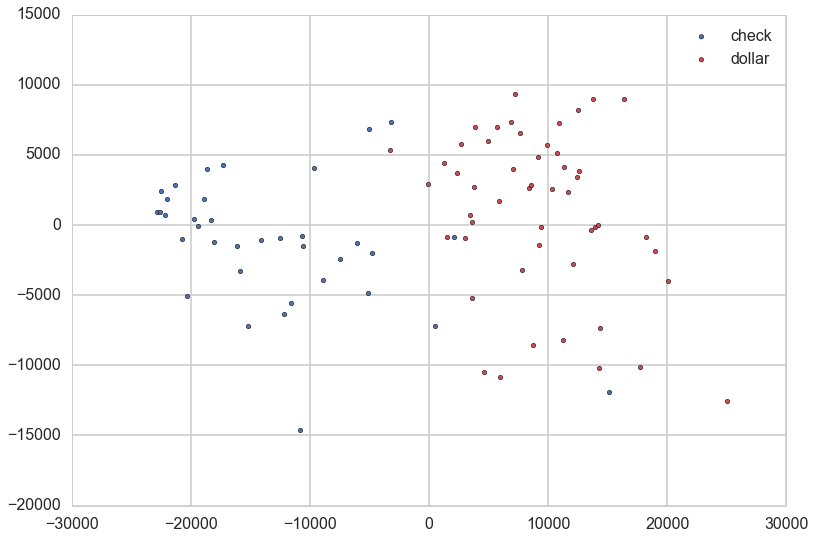

In [40]:
for label, color in zip(df['label'].unique(), colors):
    mask = df['label']==label
    plt.scatter(df[mask]['pc1'], df[mask]['pc2'], c = color, label = label)
    plt.legend()

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
ys=df['y'].astype(int).values
subdf=df[['pc1','pc2']]
subdfstd=(subdf-subdf.mean())/subdf.std()
Xs=subdfstd.values

In [47]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

def points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=True, colorscale=cmap_light, cdiscrete=cmap_bold, alpha=0.1, psize=10, zfunc=False, predicted=False):
    h = .02
    X=np.concatenate((Xtr, Xte))
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    #plt.figure(figsize=(10,6))
    if zfunc:
        p0 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 0]
        p1 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z=zfunc(p0, p1)
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    ZZ = Z.reshape(xx.shape)
    if mesh:
        plt.pcolormesh(xx, yy, ZZ, cmap=cmap_light, alpha=alpha, axes=ax)
    if predicted:
        showtr = clf.predict(Xtr)
        showte = clf.predict(Xte)
    else:
        showtr = ytr
        showte = yte
    ax.scatter(Xtr[:, 0], Xtr[:, 1], c=showtr-1, cmap=cmap_bold, s=psize, alpha=alpha,edgecolor="k")
    # and testing points
    ax.scatter(Xte[:, 0], Xte[:, 1], c=showte-1, cmap=cmap_bold, alpha=alpha, marker="s", s=psize+10)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    return ax,xx,yy

In [48]:
def classify(X,y,nbrs, plotit=True, train_size=0.6):
    Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,train_size=train_size)
    clf = KNeighborsClassifier(nbrs)
    clf = clf.fit(Xtrain, ytrain)
    train_accuracy=clf.score(Xtrain, ytrain)
    test_accuracy=clf.score(Xtest,ytest)
    Xall=np.concatenate((Xtrain, Xtest))
    if plotit:
        print 'Training accuracy: %0.2f' %train_accuracy
        print 'Test accuracy: %.2f' %test_accuracy
        plt.figure()
        ax=plt.gca()
        points_plot(ax, Xtrain, Xtest, ytrain, ytest, clf, alpha=0.3, psize = 20)
        
    return nbrs, train_accuracy, test_accuracy

    

Training accuracy: 1.00
Test accuracy: 0.91


(1, 1.0, 0.91428571428571426)

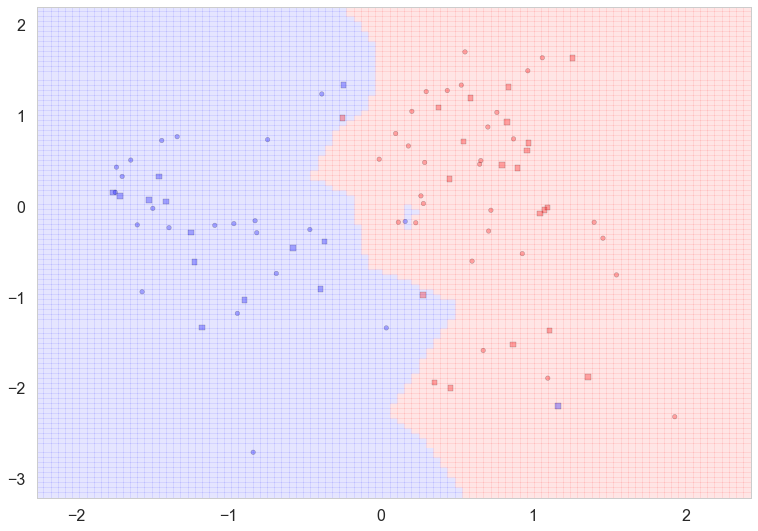

In [49]:
classify(Xs, ys, 1)

Training accuracy: 0.94
Test accuracy: 0.94


(10, 0.94230769230769229, 0.94285714285714284)

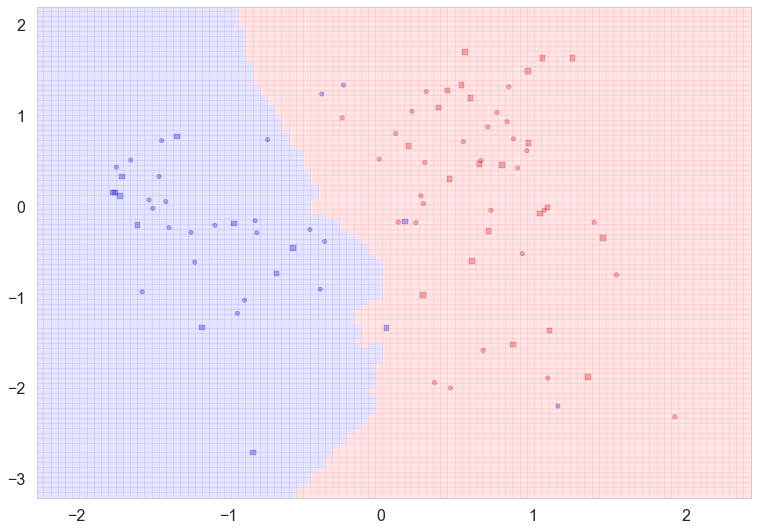

In [51]:
classify(Xs,ys,10)

In [52]:
fits = {}
for k in np.arange(1,45,1):
    fits[k]=[]
    for i in range(200):
        fits[k].append(classify(Xs,ys,k, False))
nbrs=np.arange(1,45,1)
fmeanstr = np.array([1.-np.mean([t[1] for t in fits[e]]) for e in nbrs])
fmeanste = np.array([1.-np.mean([t[2] for t in fits[e]]) for e in nbrs])
fstdsstr = np.array([np.std([t[1] for t in fits[e]]) for e in nbrs])
fstdsste = np.array([np.std([t[2] for t in fits[e]]) for e in nbrs])
    



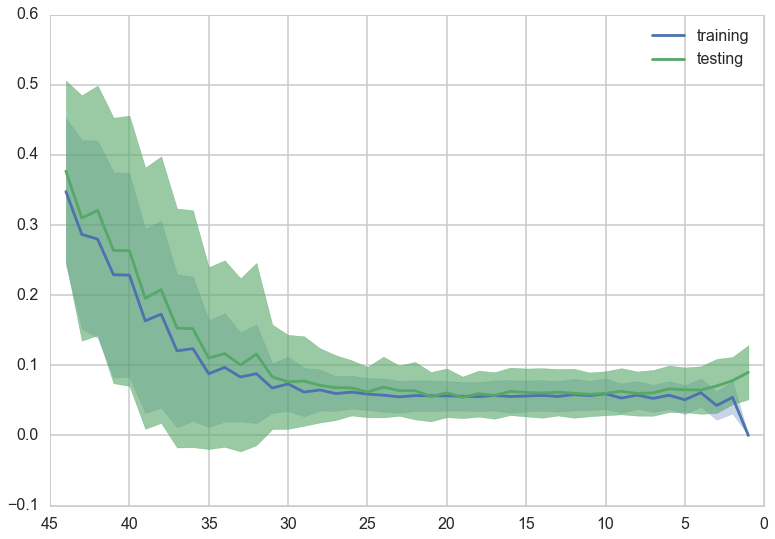

In [55]:
plt.gca().invert_xaxis()
plt.plot(nbrs, fmeanstr, color=c0, label='training');
plt.fill_between(nbrs, fmeanstr-fstdsstr, fmeanstr+fstdsstr, color=c0, alpha=0.3)
plt.plot(nbrs, fmeanste, color=c1, label='testing');
plt.fill_between(nbrs, fmeanste-fstdsste, fmeanste+fstdsste, color=c1, alpha=0.6)
plt.legend()